# ***EJERCICIOS DAGs***

***1. OBJETIVOS*** 

* Implementar y validar algoritmos de teoría de grafos mediante ejercicios prácticos que incluyen ordenamiento topológico y búsqueda de caminos mínimos en el algoritmo de Dijkstra. 


***2. INTRODUCCIÓN***

Los algoritmos sobre grafos son la herramienta fundamental cuando toca resolver problemas de ordenamiento y optimización en casi cualquier campo de la informática. En este lab, nos centramos en dos big players: el Ordenamiento Topológico y el algoritmo de Dijkstra.

El Ordenamiento Topológico es crucial; nos permite secuenciar tareas con dependencias. Piensa en la compilación de un proyecto grande o en la gestión de prerrequisitos de asignaturas: si A depende de B, la secuencia de ejecución (o de estudio) debe ser válida.

Por otro lado, el algoritmo de Dijkstra es el go-to para encontrar el camino más corto en grafos donde las aristas tienen pesos (positivos). Su uso va desde el GPS que usamos a diario hasta el enrutamiento de paquetes en una red o la planificación de rutas logísticas.

---

***3. PROBLEMAS PLANTEADOS Y SOLUCIÓN***

---

Aplique el algoritmo de ordenamiento topológico en el siguiente ejemplo:

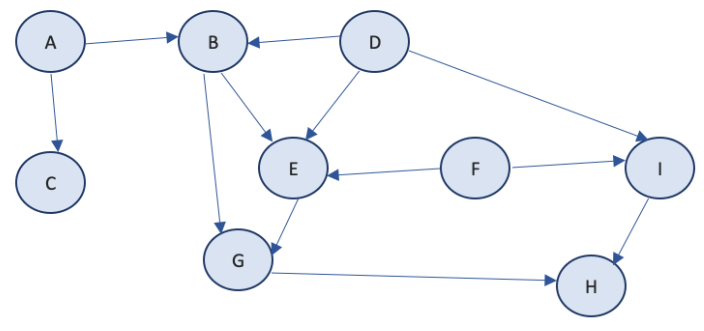

In [25]:
from collections import deque

def ordenamiento_topologico(grafo):
    grado = {nodo: 0 for nodo in grafo}
    for nodo in grafo:
        for vecino in grafo[nodo]:
            grado[vecino] += 1
    
    cola = deque([n for n in grado if grado[n] == 0])
    resultado = []
    
    while cola:
        nodo = cola.popleft()
        resultado.append(nodo)
        for vecino in grafo[nodo]:
            grado[vecino] -= 1
            if grado[vecino] == 0:
                cola.append(vecino)
    
    return resultado

grafo = {
    'A': ['B', 'C'], 'B': ['E', 'G'], 'C': [],
    'D': ['B', 'I'], 'E': ['G'], 'F': ['E', 'I'],
    'G': ['H'], 'H': [], 'I': ['H']
}

orden = ordenamiento_topologico(grafo)
print("Ordenamiento topológico:", ' → '.join(orden))

Ordenamiento topológico: A → D → F → C → B → I → E → G → H


---

Qué sucede si el grafo dirigido G dado tiene un ciclo? Pruebe el algoritmo de ordenamiento topológico con un grafo dirigido que tenga un ciclo y explique el resultado de lo que retorna.

In [26]:
from collections import deque

def ordenamiento_topologico(grafo):
    grado = {nodo: 0 for nodo in grafo}
    for nodo in grafo:
        for vecino in grafo[nodo]:
            grado[vecino] += 1
    
    cola = deque([n for n in grado if grado[n] == 0])
    resultado = []
    
    while cola:
        nodo = cola.popleft()
        resultado.append(nodo)
        for vecino in grafo[nodo]:
            grado[vecino] -= 1
            if grado[vecino] == 0:
                cola.append(vecino)
    
    return resultado


grafo = {
    'A': ['B', 'C'], 'B': ['E', 'G'], 'C': [],
    'D': ['B', 'I'], 'E': ['G'], 'F': ['E', 'I'],
    'G': ['H'], 'H': [], 'I': ['H']
}

orden = ordenamiento_topologico(grafo)
print("Ordenamiento topológico:", ' → '.join(orden))


print("\n Grafo con ciclo ")
grafo_ciclo = {
    'A': ['B'], 'B': ['C'], 'C': ['A']
}
orden_ciclo = ordenamiento_topologico(grafo_ciclo)
if len(orden_ciclo) < len(grafo_ciclo):
    print(" No se puede ordenar: El grafo tiene un CICLO")
    print(f"Procesados: {orden_ciclo}, Faltan: {set(grafo_ciclo) - set(orden_ciclo)}")
else:
    print("Orden:", orden_ciclo)

Ordenamiento topológico: A → D → F → C → B → I → E → G → H

 Grafo con ciclo 
 No se puede ordenar: El grafo tiene un CICLO
Procesados: [], Faltan: {'B', 'A', 'C'}


---

 Implemente el algoritmo de Dijkstra y despliegue la ruta más barata desde 1 hasta 5 - Trabaje con el siguiente ejemplo. Los pesos de cada arista están listados a continuación:

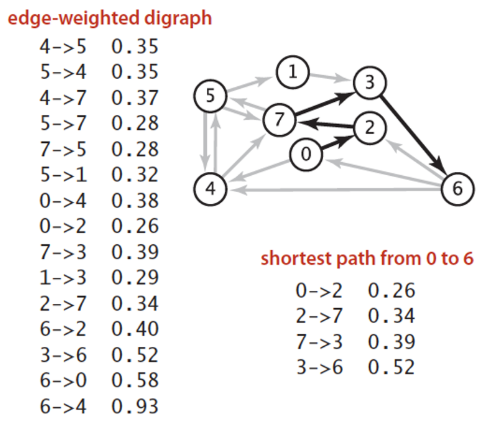 

In [27]:
import heapq

def dijkstra(grafo, inicio, fin):
    dist = {nodo: float('inf') for nodo in grafo}
    dist[inicio] = 0
    prev = {}
    pq = [(0, inicio)]
    
    while pq:
        d, u = heapq.heappop(pq)
        if d > dist[u]:
            continue
        for v, peso in grafo[u]:
            if dist[u] + peso < dist[v]:
                dist[v] = dist[u] + peso
                prev[v] = u
                heapq.heappush(pq, (dist[v], v))
    
    camino = []
    actual = fin
    while actual in prev:
        camino.append(actual)
        actual = prev[actual]
    camino.append(inicio)
    return dist[fin], camino[::-1]


grafo = {
    0: [(2, 0.26), (4, 0.38)],
    1: [(3, 0.29)],
    2: [(7, 0.34)],
    3: [(6, 0.52)],
    4: [(5, 0.35), (7, 0.37)],
    5: [(1, 0.32), (4, 0.35), (7, 0.28)],
    6: [(0, 0.58), (2, 0.40), (4, 0.93)],
    7: [(3, 0.39), (5, 0.28)]
}

distancia, camino = dijkstra(grafo, 1, 5)
print(f"Ruta más corta de 1 a 5:")
print(f"Camino: {' → '.join(map(str, camino))}")
print(f"Distancia total: {distancia:.2f}")

Ruta más corta de 1 a 5:
Camino: 1 → 3 → 6 → 2 → 7 → 5
Distancia total: 1.83


---

Implemente el algoritmo de Dijkstra y despliegue la ruta más barata desde S hasta F - Trabaje con el siguiente ejemplo (dé nombres a los nodos):

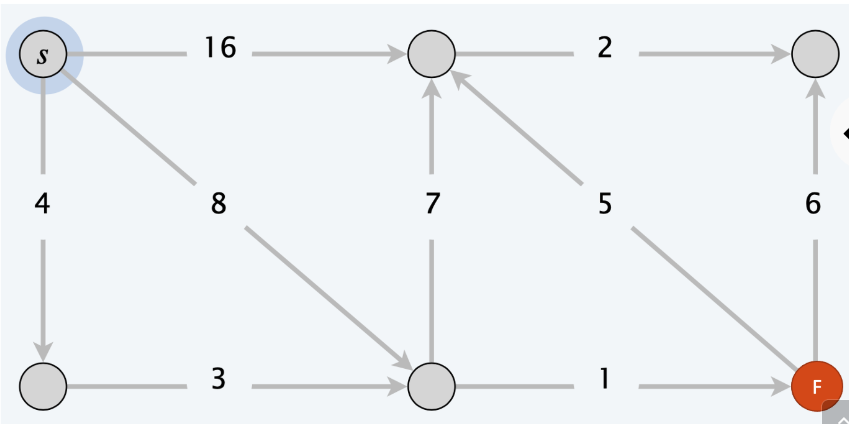

In [28]:
import heapq

def dijkstra(grafo, inicio, fin):
    dist = {nodo: float('inf') for nodo in grafo}
    dist[inicio] = 0
    prev = {}
    pq = [(0, inicio)]
    
    while pq:
        d, u = heapq.heappop(pq)
        if d > dist[u]:
            continue
        for v, peso in grafo[u]:
            if dist[u] + peso < dist[v]:
                dist[v] = dist[u] + peso
                prev[v] = u
                heapq.heappush(pq, (dist[v], v))
    
    camino = []
    actual = fin
    while actual in prev:
        camino.append(actual)
        actual = prev[actual]
    camino.append(inicio)
    return dist[fin], camino[::-1]

grafo = {
    'S': [('N1', 16), ('N3', 4), ('N4', 8)],
    'N1': [('N2', 2)],
    'N2': [('F', 6)],
    'N3': [('N4', 3)],
    'N4': [('N1', 7), ('N5', 5)],
    'N5': [('N2', 1), ('F', 6)],
    'F': []
}

distancia, camino = dijkstra(grafo, 'S', 'F')
print(f"Ruta más corta de S a F:")
print(f"Camino: {' → '.join(camino)}")
print(f"Distancia total: {distancia}")

Ruta más corta de S a F:
Camino: S → N3 → N4 → N5 → F
Distancia total: 18


---

***4. CONCLUSIONES***

* Con el Ordenamiento Topológico se demostró su capacidad no solo para generar una secuencia de ejecución válida (A → D → F → C → B → I → E → G → H), respetando dependencias, sino también su función como validador de estructura. La detección automática de ciclos confirma que es una herramienta esencial para prevenir deadlocks o dependencias circulares imposibles en sistemas reales, como gestores de proyectos o build systems.

* Con el algoritmo de Dijkstra en dos grafos diferentes se confirmó su relevancia para problemas de optimización. Al encontrar y reconstruir las rutas de costo mínimo en grafos ponderados, probamos su utilidad directa en áreas como el enrutamiento de redes o la planificación logística, donde minimizar costes o tiempos es crucial.

***5. REFERENCIAS BIBLIOGRÁFICAS***

- *Recalde, L. (2025). Estructuras de Datos y Algoritmos II: Depth-first Search [Diapositivas de clase]. Escuela Politécnica Nacional, Computación.*

***6. DECLARACIÓN DE USO DE IA Y PROMPTS*** 

*6.1	Herramienta utilizada:* Claude

*6.2	Propósito del uso:* Corregir la estructura del código del algoritmo Dijkstra 

*6.3	Prompts o instrucciones proporcionadas:* 

    * El siguiente código esta correctamente estructurado para representar el algoritmo Dijkstra 

Código: "

```` python import heapq

def dijkstra(grafo, inicio, fin):
    dist = {nodo: float('inf') for nodo in grafo}
    dist[inicio] = 0
    prev = {}
    pq = [(0, inicio)]
    
    while pq:
        d, u = heapq.heappop(pq)
        if d > dist[u]:
            continue
        for v, peso in grafo[u]:
            if dist[u] + peso < dist[v]:
                dist[v] = dist[u] + peso
                prev[v] = u
                heapq.heappush(pq, (dist[v], v))
    
    camino = []
    actual = fin
    while actual in prev:
        camino.append(actual)
        actual = prev[actual]
    camino.append(inicio)
    return dist[fin], camino[::-1]

grafo = {
    'S': [('N1', 16), ('N3', 4), ('N4', 8)],
    'N1': [('N2', 2), ('N4', 7), ('N5', 5)],
    'N2': [('F', 6)],
    'N3': [('N4', 3), ('N5', 7)],
    'N4': [('N1', 7), ('N5', 8), ('F', 5)],
    'N5': [('N2', 5), ('F', 1)],
    'F': []
}

distancia, camino = dijkstra(grafo, 'S', 'F')
print(f"Ruta más corta de S a F:")
print(f"Camino: {' → '.join(camino)}")
print(f"Distancia total: {distancia}")
"

*6.4	Uso del contenido generado:* Si, para la correción del grafo 

*6.5	Revisión y edición:* Se hizo la revsión correspondiente de la estructura del grafo y como se encontro error, verifique el error y lo edite. 

*6.6	Limitaciones y consideraciones éticas:* Se ocupo la IA para la detección de errores y la pronta corrección de los mismos. 

*Fecha de entrega: 26/11/2025*